<a href="https://colab.research.google.com/github/MoeinDSP/Numerical-Analysis-for-Machine-Learning/blob/main/NAML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Moein Taherinezhad

email: moein.taherinezhad@mail.polimi.it

Subject for the emails: NAML2024

# Introduction to Python

## Project 6: Fibonacci numbers

**Skills.**


*   recursion
*   <code>range</code> function
* list comprehension
* slicing



**Problem.** The well known Fibonacci sequence is defined by the following recursive relation:

$$
F(0)=0, \\
F(1)=1, \\
F(n)=F(n-1)+F(n-2).
$$

Let us write a function that computes the n*th* term of the sequence using recursion.

In [1]:
25
int(-25)

-25

In [2]:
def recfib(n):
   # add check for input!
   if n <= 1:
       return n
   else:
       return(recfib(n-1) + recfib(n-2))

In [3]:
recfib(5)

5

Let us introduce the function <code>range</code>: this function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and stops before a specified number.

The general syntax is <code>range(start, stop, step)</code> where *start* and *step* are optional whereas *stop* is required. Let us consider some examples.

In [4]:
R1 = range(6)
print(R1)

range(0, 6)


In [5]:
print(list(R1))

[0, 1, 2, 3, 4, 5]


In [6]:
R2=range(10,20,2)
print(list(R2))

[10, 12, 14, 16, 18]


In [7]:
R3=range(20,10,-1)
print(list(R3))

[20, 19, 18, 17, 16, 15, 14, 13, 12, 11]


Now let us use the *list comprehension* technique to obtain the sequence up to the n*th* term.

*List compehension* in Python is a concise way of creating lists from the ones that already exist.

In [8]:
F=[recfib(n) for n in range(15)]
print(F)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


In [9]:
type(F)

list

Let us see how we can extract elements from the list using the *slicing* technique: in general given a Pytho list $L$ you can use the syntax
<code>L(start:stop:step)</code>, where all parameters are optional.

In [10]:
F[1:4]  # NOTE: the 4th element is not included!

[1, 1, 2]

In [ ]:
F[5:] # From the 5th element to the end (included)!

In [11]:
F[3:11:3]

[2, 8, 34]

In [ ]:
F[5:10:-1]

In [ ]:
F[10:5:-1]

In [ ]:
F[::-1] # NOTE!!!!

**Exercise.** Write a function for computing the Recaman sequence defined as follows ($n>0$):

$$
R(0)=0,
$$
$$
R(n)=
\left\{
\begin{array}R
 R(n-1) -n \textrm{ if non negative and not already present,} \\
 R(n-1) +n \textrm{ otherwise.}
\end{array}
\right.
$$

In [15]:
def generate_sequence(n):
    sequence = [0]  # Start with R(0) = 0

    for i in range(1, n + 1):
        next_value = sequence[-1] - i
        # Check if the next value is non-negative and not already in the sequence
        if next_value >= 0 and next_value not in sequence:
            sequence.append(next_value)
        else:
            # Otherwise, add the next value as R(n-1) + n
            sequence.append(sequence[-1] + i)

    return sequence

# Example usage:
n = 10  # Change n to generate a longer sequence
sequence = generate_sequence(n)
print(sequence)


[0, 1, 3, 6, 2, 7, 13, 20, 12, 21, 11]


##Project 7: Computation of $\pi$ using Monte Carlo method

**Skills.**

* <code>+=</code> (and similar) operator
* introduction of *Numpy* arrays
* append element to a list and list concatenation
* introduction of *Matplotlib*

**Problem.** Let us pick $N$ random points in a $2D$ plane within a square of side 2 centered in (0,0).

Imagine a circle inscribed into the square; the idea is to use the ratio of number points that lie inside the circle ($N_{\textrm{inside}}$) to the total number of generated points to compute $\pi$. Why does it work ?

The probability that a point falls inside the circle is directly proportional to the area of the circle *i.e.*

$$
\frac{N_{\textrm{inside}}}{N}=\frac{\textrm{Area of the circle}}{\textrm{Area of the square}}.
$$

Moreover we know that area of the square is $4$ while that of circle is $\pi$. The ratio of these two areas is:

$$
\frac{\textrm{Area of the circle}}{\textrm{Area of the square}}=\frac{\pi}{4},
$$

we can compute $\pi$ as

$$
\pi= 4\frac{N_{\textrm{inside}}}{N}.
$$

In [ ]:
import math as mt
import random

def compute_pi_mc(N):
  circle_points = 0
  square_points = 0

  for i in range(N):
    # Generate a random point
    rand_x = random.uniform(-1, 1)
    rand_y = random.uniform(-1, 1)

    # Compute the distance of the point from the origin
    dist = mt.sqrt(rand_x**2 + rand_y**2)

    # Check if the point lies inside the circle
    if dist <= 1:
      circle_points += 1

    square_points += 1

  # Estimate the value of pi
  pi_est = 4.0 * circle_points / square_points

  return pi_est

In [ ]:
N=1000
compute_pi_mc(N)

3.172

Let us now try to visualize the procedure. In order to obatin this result we modify the function so that the output is given by:


*   the estimated value of $\pi$;
*   the $x$ and $y$ coordinates of the points inside the circle;
*   the $x$ and $y$ coordinates of the points outside the circle;
*   the vector containing all the iterates of the estimated value of $\pi$.

We introduce also **Numpy** which is the module of Python that provides the implementation of *arrays*.  


In [ ]:
import math as mt
import random
import numpy as np

def compute_pi_mc_g(N):

  circle_points = 0
  square_points = 0
  x_in=[]
  y_in=[]
  x_out=[]
  y_out=[]
  vec_pi_est = np.empty([N])

  for i in range(N):
    # Generate a random point
    rand_x = random.uniform(-1, 1)
    rand_y = random.uniform(-1, 1)

    # Compute the distance of the point from the origin
    dist = mt.sqrt(rand_x**2 + rand_y**2)

    # Check if the point lies inside the circle
    if dist <= 1:
      circle_points += 1
      x_in = x_in + [rand_x]  #x_in.append(rand_x)
      y_in = y_in + [rand_y]  #y_in.append(rand_y)
    else:
      x_out.append(rand_x)
      y_out.append(rand_y)

    square_points += 1

    # Estimate the value of pi
    pi_est = 4.0 * circle_points / square_points
    vec_pi_est[i] = pi_est

  return pi_est,x_in,y_in,x_out,y_out,vec_pi_est

In [ ]:
N=1000
pi_est,x_in,y_in,x_out,y_out,vec_pi_est = compute_pi_mc_g(N);

Now we have to plot the obtained data. The module of Python for plotting is **Matplotlib**.

In [ ]:
import numpy as np
import math as mt

In [ ]:
g=np.linspace(0,10,20)
type(g)
np.cos(g)

array([ 1.        ,  0.8646637 ,  0.49528663, -0.00815095, -0.5093823 ,
       -0.87273782, -0.99986712, -0.8563598 , -0.48105935,  0.02445069,
        0.52334259,  0.88058   ,  0.99946853,  0.84782832,  0.46670422,
       -0.04074393, -0.53716381, -0.88818817, -0.99880433, -0.83907153])

In [ ]:
l=[1,2,3,4,5]
type(l)

list

In [ ]:
la = np.array(l)

In [ ]:
la

array([1, 2, 3, 4, 5])

In [ ]:
la = np.array([[1,2],[3,4]])
la

array([[1, 2],
       [3, 4]])

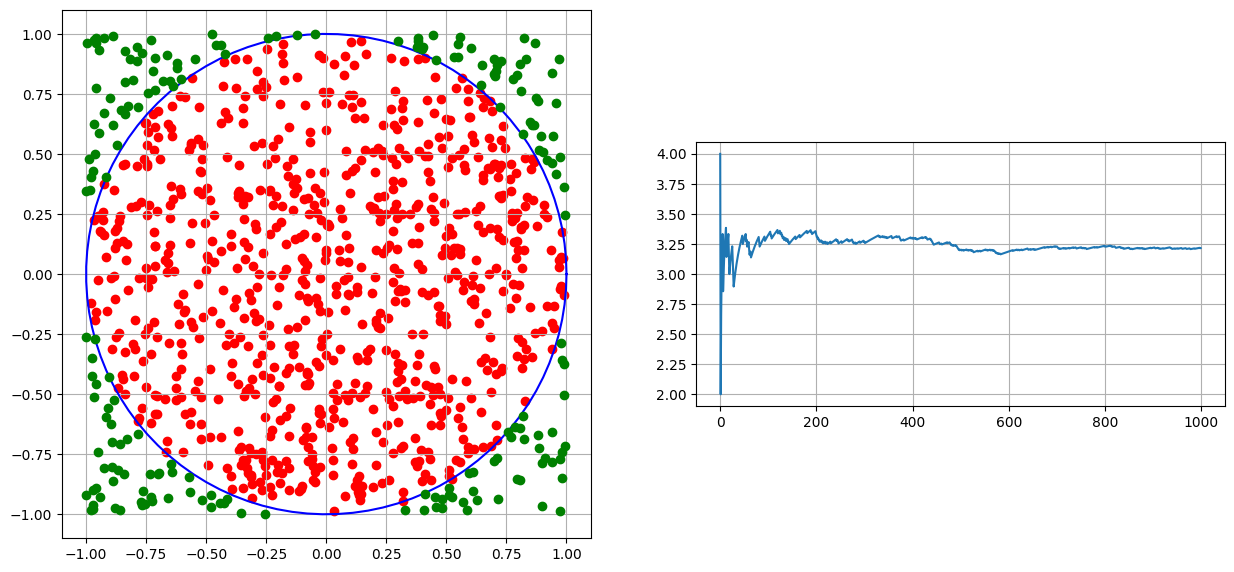

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
fig, (ax1, ax2) = plt.subplots(1, 2)

# Draw a unit circle centered at the origin
angles = np.linspace(0 * np.pi, 2 * np.pi, 100 )
xs = np.cos(angles)
ys = np.sin(angles)
ax1.set_aspect( 1 )
ax1.plot(xs, ys, color = 'blue')
# Draw the points
x_in = np.array(x_in)
y_in = np.array(y_in)
x_out = np.array(x_out)
y_out = np.array(y_out)
ax1.scatter(x_in,y_in,c='r')
ax1.plot(x_out,y_out,'o',c='g')
ax1.grid()

ax2.grid()
ax2.plot(vec_pi_est)
ax2.set_aspect( 250 )
